<a href="https://colab.research.google.com/github/saksham1965/data-analyst/blob/main/ASSIGNMENT_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
from google.colab import files
uploaded = files.upload()


Saving ecommerce_data.csv to ecommerce_data.csv


In [6]:
import pandas as pd

df = pd.read_csv('ecommerce_data.csv')

In [ ]:
df[['Purchase_Amount', 'Delivery_Time', 'Rating']].describe()

,Purchase_Amount,Delivery_Time,Rating
count,1000.000000,1000.000000,1000.000000
mean,4119.860500,4.922000,3.147000
std,2805.714062,2.103887,1.430188
min,91.840000,0.000000,1.000000
25%,2052.425000,3.000000,2.000000
50%,3458.130000,5.000000,3.000000
75%,5484.315000,6.000000,4.000000
max,15573.780000,12.000000,5.000000


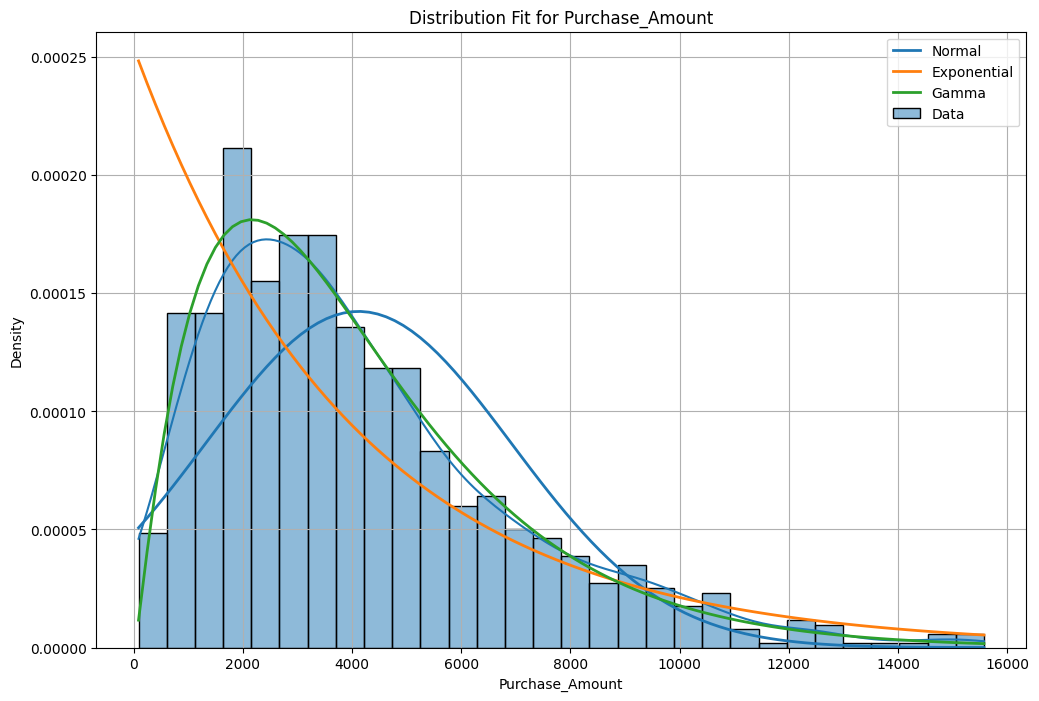

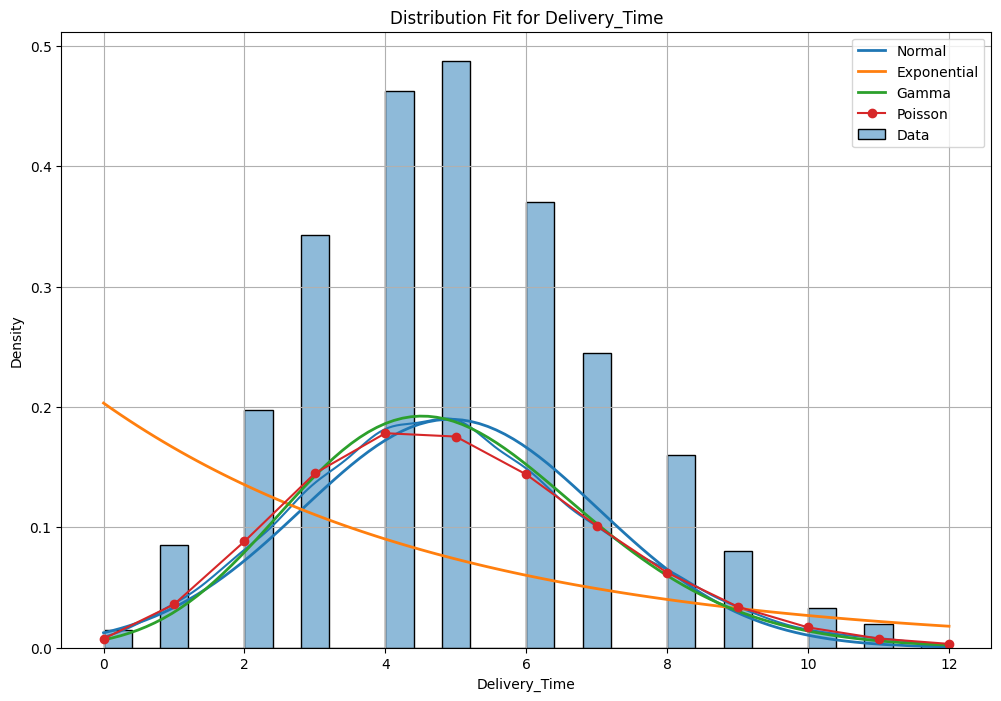

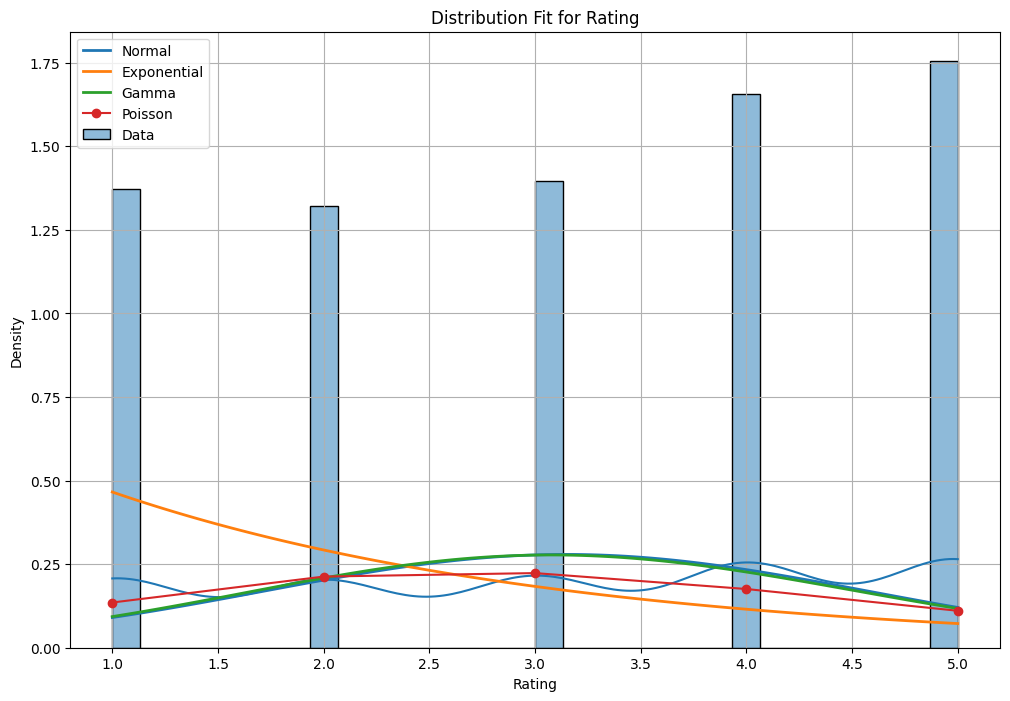

In [22]:
columns = ['Purchase_Amount', 'Delivery_Time', 'Rating']

for col in columns:
    data = df[col].dropna()


    plt.figure(figsize=(12, 8))
    sns.histplot(data, bins=30, kde=True, stat="density", label='Data')

    mu, std = stats.norm.fit(data)
    x = np.linspace(min(data), max(data), 100)
    plt.plot(x, stats.norm.pdf(x, mu, std), label='Normal', linewidth=2)
    loc, scale = stats.expon.fit(data)
    plt.plot(x, stats.expon.pdf(x, loc, scale), label='Exponential', linewidth=2)

    a, loc, scale = stats.gamma.fit(data)
    plt.plot(x, stats.gamma.pdf(x, a, loc, scale), label='Gamma', linewidth=2)

    if np.all(data.dropna().astype(int) == data) and (data >= 0).all():
        lambda_poisson = np.mean(data)
        x_poisson = np.arange(min(data), max(data) + 1)
        plt.plot(x_poisson, stats.poisson.pmf(x_poisson, lambda_poisson), 'o-', label='Poisson')

    plt.title(f'Distribution Fit for {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

Mean: 50.18, Std Dev: 5.01


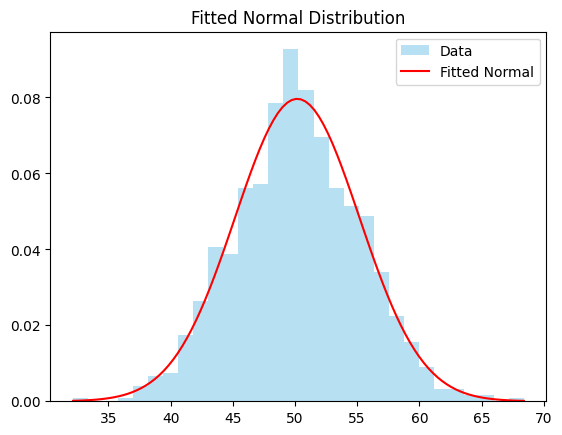

In [21]:
data = np.random.normal(loc=50, scale=5, size=1000)

param = stats.norm.fit(data)

print(f"Mean: {param[0]:.2f}, Std Dev: {param[1]:.2f}")

x = np.linspace(min(data), max(data), 100)
pdf_fitted = stats.norm.pdf(x, *param)

plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', label='Data')
plt.plot(x, pdf_fitted, 'r-', label='Fitted Normal')
plt.title("Fitted Normal Distribution")
plt.legend()
plt.show()

In [20]:
data = np.random.normal(loc=0, scale=1, size=1000)


statistic, p_value = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))
print(f"K-S Test: statistic={statistic:.4f}, p-value={p_value:.4f}")

K-S Test: statistic=0.0311, p-value=0.2812


In [12]:
from scipy.stats import norm

mu = 50
sigma = 10
x = 60
prob = 1 - norm.cdf(x, loc=mu, scale=sigma)

print(f"P(X > {x}) = {prob:.4f}")

P(X > 60) = 0.1587


In [17]:
from scipy.stats import norm

mu_purchase = 4000
sigma_purchase = 1000
purchase_threshold = 5000

mu_delivery = 5
sigma_delivery = 2
delivery_threshold = 7

prob_purchase = 1 - norm.cdf(purchase_threshold, loc=mu_purchase, scale=sigma_purchase)


prob_delivery = 1 - norm.cdf(delivery_threshold, loc=mu_delivery, scale=sigma_delivery)

combined_prob = prob_purchase * prob_delivery

print(f"P(Purchase > ₹5000) = {prob_purchase:.4f}")
print(f"P(Delivery > 7 days) = {prob_delivery:.4f}")
print(f"Combined Probability (independent) = {combined_prob:.4f}")

P(Purchase > ₹5000) = 0.1587
P(Delivery > 7 days) = 0.1587
Combined Probability (independent) = 0.0252


In [19]:
mu_rating = 4
sigma_rating = 1
rating_threshold = 3
prob_rating_below_3 = norm.cdf(rating_threshold, loc=mu_rating, scale=sigma_rating)
print(f"P(Rating < 3) = {prob_rating_below_3:.4f}")

P(Rating < 3) = 0.1587
